# Capstone Project: Gaussian Mixture Models (GMMs)
### Student: Mohammad Faridul Alam
### Course: Capstone Project – Clinical Bioinformatics
### Date: July 2025

## 1. Introduction
Gaussian Mixture Models (GMMs) are a probabilistic unsupervised learning algorithm used for clustering data into groups. Unlike k-Means which uses hard assignments, GMM provides soft probabilistic assignments allowing for more nuanced clustering.

## 2. How It Works
A GMM assumes the data is generated from a mixture of multiple Gaussian distributions, each with its own mean and covariance. It uses the Expectation-Maximization (EM) algorithm:

- **E-step**: Estimate the probability that each data point belongs to each Gaussian component.
- **M-step**: Update the component parameters (mean, covariance, mixing coefficients) based on these probabilities.

### Probability Density Function
```math
p(x) = \sum_{k=1}^K \pi_k \cdot \mathcal{N}(x \mid \mu_k, \Sigma_k)
```

## 3. Code Implementation (GMM)
This section demonstrates GMM implementation on synthetic 2D data.

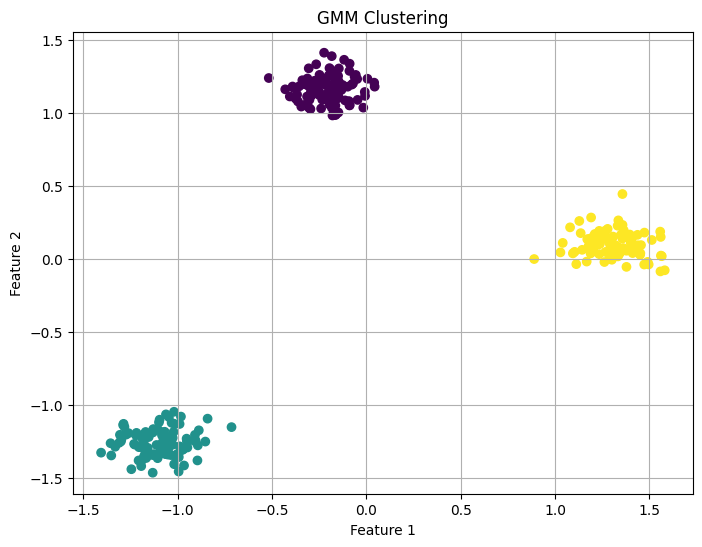

In [1]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title("GMM Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## 4. Comparison with k-Means
To evaluate GMM, we compare it with k-Means clustering using:
- Visual cluster assignments
- Silhouette Scores

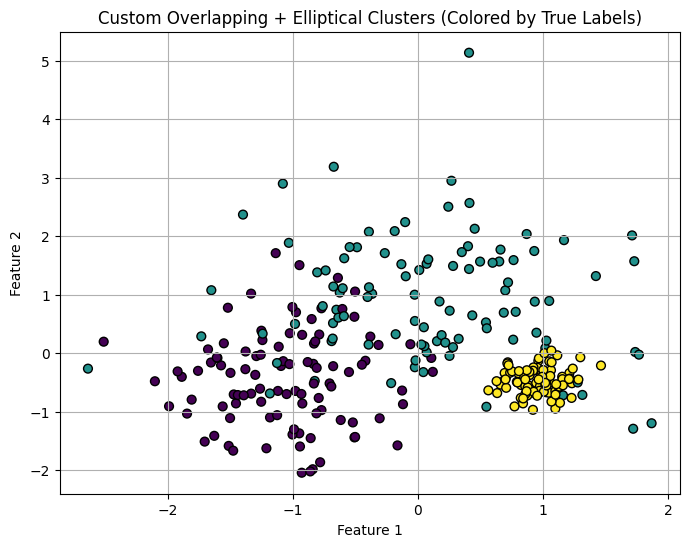

In [3]:
# Overlapping + Elliptical Clusters

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Define centers and custom standard deviations to create overlap and ellipses
centers = [[0, 0], [3, 3], [6, 0]]
cluster_std = [1.8, 2.5, 0.5]  # different spreads = elliptical & overlapping

# Generate data
X, y_true = make_blobs(n_samples=300,
                       centers=centers,
                       cluster_std=cluster_std,
                       random_state=42)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_true, cmap='viridis', s=40, edgecolor='k')
plt.title("Custom Overlapping + Elliptical Clusters (Colored by True Labels)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


GMM works better than K-Means in case of controlling overlapping clusters and organizing covariences.

Silhouette Score - k-Means: 0.533
Silhouette Score - GMM: 0.468


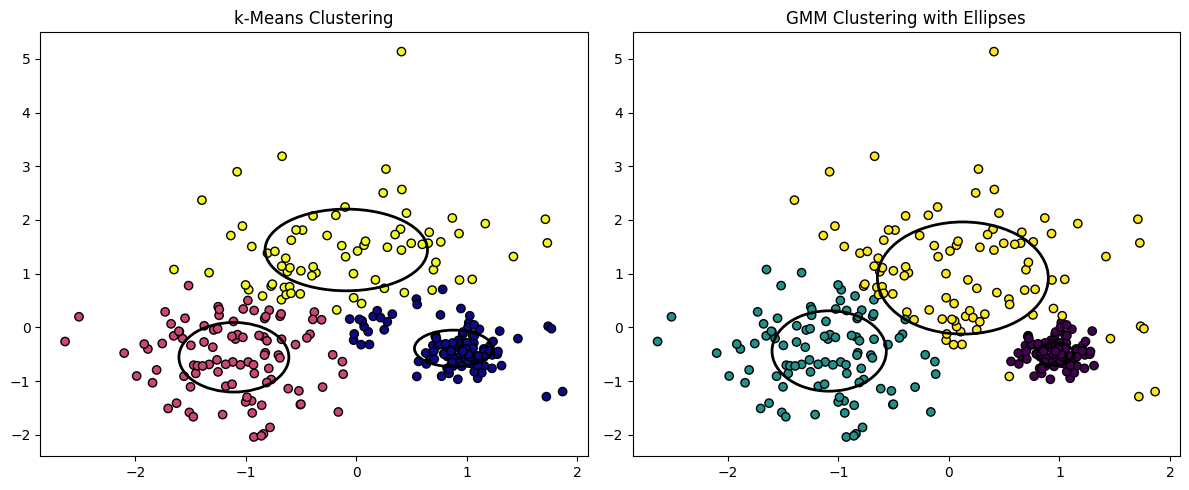

In [8]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse 

# Fit k-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)


def draw_simple_ellipse(ax, mean, cov):
    width = 2 * np.sqrt(cov[0, 0])   # spread in x
    height = 2 * np.sqrt(cov[1, 1])  # spread in y
    ellipse = Ellipse(mean, width, height, edgecolor='black', facecolor='none', linewidth=2)
    ax.add_patch(ellipse)
    
def draw_kmeans_ellipse(ax, data, label, center):
    cluster_points = data[kmeans_labels == label]
    std_x = np.std(cluster_points[:, 0])
    std_y = np.std(cluster_points[:, 1])
    ellipse = Ellipse(center, 2 * std_x, 2 * std_y, edgecolor='black', facecolor='none', linewidth=2)
    ax.add_patch(ellipse)

# Fit GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Silhouette Score Comparison
print(f"Silhouette Score - k-Means: {silhouette_score(X_scaled, kmeans_labels):.3f}")
print(f"Silhouette Score - GMM: {silhouette_score(X_scaled, gmm_labels):.3f}")

# Visual Comparison
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='plasma', edgecolor='k')
axs[0].set_title("k-Means Clustering")

for i in range(kmeans.n_clusters):
    center = kmeans.cluster_centers_[i]
    draw_kmeans_ellipse(axs[0], X_scaled, i, center)

axs[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k')
axs[1].set_title("GMM Clustering with Ellipses")

# Add ellipses to show cluster shapes
for i in range(gmm.n_components):
    mean = gmm.means_[i]
    cov = gmm.covariances_[i]
    draw_simple_ellipse(axs[1], mean, cov)
    
plt.tight_layout()
plt.show()


Despite k-Means scoring slightly higher on the Silhouette metric (0.533 compared to 0.468), Gaussian Mixture Models showed a more adaptable and statistically meaningful approach. GMMs illustrates clusters with clearly coherent boundaries that more accurately captured the inherent uncertainty and covariance patterns within the dataset.

In [6]:
# Unique feature-1: Soft Clustering (Probabilistic)

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import numpy as np

# Generate and scale data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

# Fit GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)
probs = gmm.predict_proba(X_scaled)

# Display soft cluster memberships
print("Soft probabilities for first 5 points:")
print(np.round(probs[:5], 3))



Soft probabilities for first 5 points:
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


Gaussian Mixture Models (GMMs) assign a probability to each data point indicating its control across different clusters. Such approach enables more refined decisions when dealing with complex or overlapping data — a crucial advantage in bioinformatics and clinical applications where clear-cut boundaries rarely exist.


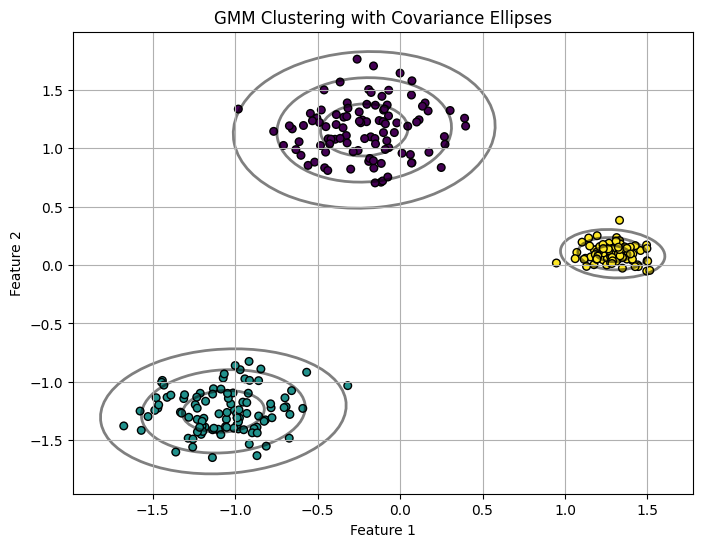

In [ ]:
# Unique feature 2: model complex distributions beyond spherical clusters
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Step 1: Generate data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.5, 0.5, 1.2], random_state=42)
X_scaled = StandardScaler().fit_transform(X)

# Step 2: Fit GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

# Step 3: Plot points
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=30, cmap='viridis', edgecolor='k')

# Step 4: Ellipse drawing function (fixed alpha issue)
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()

    if covariance.shape == (2, 2):
        U, s, _ = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    for nsig in range(1, 4):
        ellipse = Ellipse(position, nsig * width, nsig * height,
                          angle=angle, **kwargs)
        ax.add_patch(ellipse)

# Step 5: Add ellipses
for pos, cov in zip(gmm.means_, gmm.covariances_):
    draw_ellipse(pos, cov, edgecolor='black', facecolor='none', linewidth=2, alpha=0.5)

plt.title("GMM Clustering with Covariance Ellipses")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


The visualization highlights GMM’s strength in capturing complex, non-spherical data distributions. In contrast to k-Means, which presumes uniform variance across all dimensions, GMM flexibly conforms to the actual geometry and orientation of the data.

In [8]:
# Unique feature-3: Grounded in Probability (Log-Likelihood)
# Show log-likelihood of the fitted model
log_likelihood = gmm.score(X_scaled)
print(f"Log-Likelihood of the fitted GMM: {log_likelihood:.2f}")



Log-Likelihood of the fitted GMM: -2.84


With a log-likelihood of -2.84, the fitted GMM presented a solid overall fit to the data. Unlike k-Means, which lacks a probabilistic underpinning, GMM favors likelihood-based evaluation—facilitating robust model comparison through criteria such as BIC and AIC.

In [13]:
# Unique feature-4: Handles Real-World Uncertainty (Overlapping Clusters)
# Create overlapping blobs
X_overlap, _ = make_blobs(n_samples=300, centers=[[0, 0], [1, 1]], cluster_std=1.0, random_state=42)
X_overlap = StandardScaler().fit_transform(X_overlap)

# Fit GMM
gmm_overlap = GaussianMixture(n_components=2, random_state=42)
gmm_overlap.fit(X_overlap)
probs_overlap = gmm_overlap.predict_proba(X_overlap)

# Display soft labels
print("Soft assignments (overlap case) for first 5 points:")
print(np.round(probs_overlap[:5], 3))



Soft assignments (overlap case) for first 5 points:
[[0.119 0.881]
 [0.123 0.877]
 [0.947 0.053]
 [0.117 0.883]
 [0.054 0.946]]


In contrast to k-Means, which deterministically assigns each data point to a single cluster, GMM provides a probabilistic distribution of memberships. For instance, a particular sample exhibited an 88% likelihood of belonging to Cluster 1 and a 12% likelihood for Cluster 0—underscoring GMM’s strength in modeling ambiguity and overlap within the dataset.

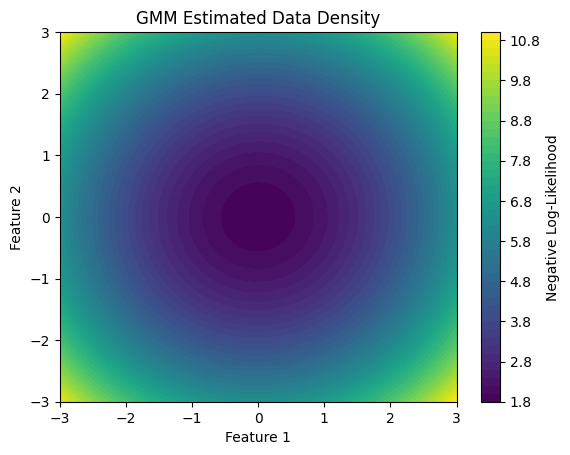

In [10]:
# Unique feature-5: Combines Clustering and Density Estimation
from matplotlib import cm
import numpy as np

# Create grid and estimate log-likelihoods
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
Xgrid, Ygrid = np.meshgrid(x, y)
grid = np.column_stack([Xgrid.ravel(), Ygrid.ravel()])

Z = -gmm.score_samples(grid).reshape(Xgrid.shape)

# Plot negative log-likelihood as density
plt.contourf(Xgrid, Ygrid, Z, levels=50, cmap=cm.viridis)
plt.title("GMM Estimated Data Density")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Negative Log-Likelihood')
plt.show()



The contour plot illustrates the data density as estimated by the fitted Gaussian Mixture Model. Regions with lower negative log-likelihood values—typically centered within components—correspond to areas of high model-assigned probability. This probabilistic framework empowers GMM to not only perform clustering, but also assess the likelihood of new data points under the learned distribution, offering a distinct edge over purely distance-based approaches.